In [4]:
%env HF_TOKEN=YOUR_TOKEN_HERE

env: HF_TOKEN=YOUR_TOKEN_HERE


{'trained_betas'} was not found in config. Values will be initialized to default values.
100%|██████████████████████████████████████████████████████████████████| 51/51 [00:04<00:00, 10.49it/s]


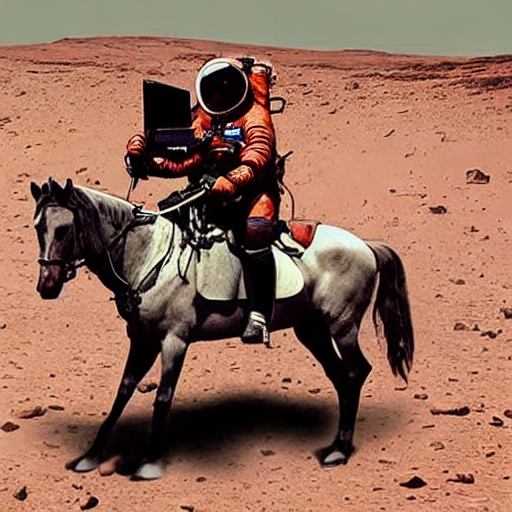

In [3]:
import os
import torch
import transformers

from torch import autocast
from diffusers import StableDiffusionPipeline

HF_TOKEN =  os.environ.get("HF_TOKEN")

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=HF_TOKEN
)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

prompt = "a photo of an astronaught riding a horse on mars"
with autocast("cuda"):
    image = pipe(prompt)["sample"][0]  

display(image)